In [1]:
import torch

In [83]:
import matplotlib.pyplot as plt
import cv2

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(device)

cuda:0


In [84]:
from ultralytics import YOLO

model_1 = YOLO('yolov8n.pt') 

In [88]:
from PIL import Image
import torchvision.transforms as transforms
dir = 'resources/'

image_path = dir + "kies.jpg"

image = Image.open(image_path)

In [89]:
result = model_1(image)


0: 384x640 1 cat, 1 dog, 1758.3ms
Speed: 55.0ms preprocess, 1758.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


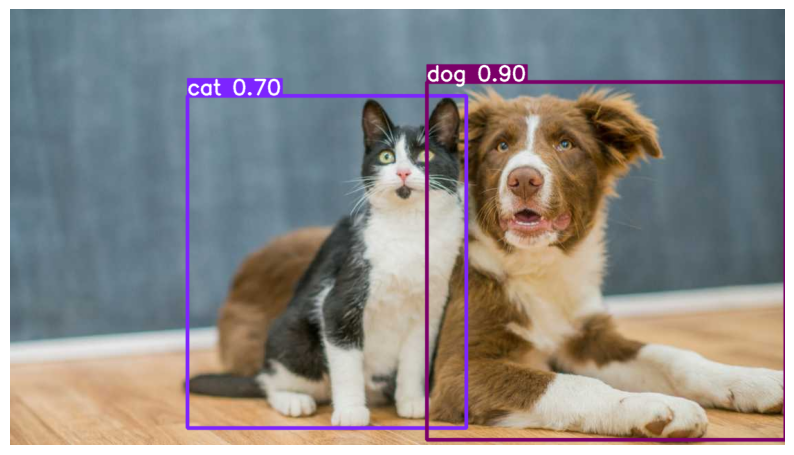

In [90]:
annotated_frame = result[0].plot()
annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10)) 
plt.imshow(annotated_frame_rgb, cmap=None)
plt.axis("off")  
plt.show()

In [7]:
import pandas as pd

classes = pd.read_csv(dir + "class-descriptions-boxable.csv", header=None)
food_class = classes[classes[1].str.contains("Food")].iloc[0, 0]
print(food_class)


/m/02wbm


In [8]:
annotations = pd.read_csv(dir + "train-annotations-bbox.csv")
food_images = annotations[annotations["LabelName"] == food_class]
image_ids = food_images["ImageID"].unique()
print(f"Food photos number: {len(image_ids)}")


Food photos number: 25712


In [9]:
image_width = 1024  
image_height = 768 

def convert_to_yolo(row):
    x_center = (row["XMin"] + row["XMax"]) / 2
    y_center = (row["YMin"] + row["YMax"]) / 2
    width = row["XMax"] - row["XMin"]
    height = row["YMax"] - row["YMin"]
    return f"0 {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}"

for image_id in image_ids:
    image_annotations = food_images[food_images["ImageID"] == image_id]
    with open(f"food_images/{image_id}.txt", "w") as f:
        for _, row in image_annotations.iterrows():
            f.write(convert_to_yolo(row) + "\n")


KeyboardInterrupt: 

In [10]:
import yaml

data = {
    "train": "D:/Studia/S7/obrazy-s6/lab4/food_images/train",
    "val": "D:/Studia/S7/obrazy-s6/lab4/food_images/val",
    "nc": 1,
    "names": ["food"]
}

with open("food_dataset.yaml", "w") as f:
    yaml.dump(data, f)

In [12]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt') 

In [15]:
model.train(data='food_dataset.yaml', epochs=5, imgsz=640, device=device, batch=16, plots=True, pretrained=True, verbose=True)

New https://pypi.org/project/ultralytics/8.3.35 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=food_dataset.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

train: Scanning D:\Studia\S7\obrazy-s6\lab4\food_images\train.cache... 21106 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21106/21106 [00:00<?, ?it/s]
val: Scanning D:\Studia\S7\obrazy-s6\lab4\food_images\val.cache... 4606 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4606/4606 [00:00<?, ?it/s]


Plotting labels to D:\Studia\S7\obrazy-s6\runs\detect\train6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to D:\Studia\S7\obrazy-s6\runs\detect\train6
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.58G      1.429      1.678      1.449          3        640: 100%|██████████| 1320/1320 [12:47<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [02:55<00:00,  1.22s/it]


                   all       4606      15299      0.491      0.403      0.388      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.86G      1.468      1.523      1.478          5        640: 100%|██████████| 1320/1320 [13:51<00:00,  1.59it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   1%|▏         | 2/144 [00:03<03:29,  1.47s/it]

WARNING  NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [01:54<00:00,  1.26it/s]


                   all       4606      15299      0.542      0.406      0.428      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5       3.9G      1.441      1.461      1.459          9        640: 100%|██████████| 1320/1320 [11:20<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [01:05<00:00,  2.19it/s]


                   all       4606      15299      0.584       0.42      0.465      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      3.06G      1.397      1.399      1.435         11        640: 100%|██████████| 1320/1320 [11:30<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [01:35<00:00,  1.51it/s]


                   all       4606      15299      0.572      0.458      0.485      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.86G      1.345      1.317        1.4          8        640: 100%|██████████| 1320/1320 [11:22<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:56<00:00,  2.54it/s]


                   all       4606      15299      0.609      0.475      0.514      0.302

5 epochs completed in 1.168 hours.
Optimizer stripped from D:\Studia\S7\obrazy-s6\runs\detect\train6\weights\last.pt, 6.2MB
Optimizer stripped from D:\Studia\S7\obrazy-s6\runs\detect\train6\weights\best.pt, 6.2MB

Validating D:\Studia\S7\obrazy-s6\runs\detect\train6\weights\best.pt...
Ultralytics 8.3.34  Python-3.11.9 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 960, 4096MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:55<00:00,  2.58it/s]


                   all       4606      15299       0.61      0.475      0.514      0.302
Speed: 0.3ms preprocess, 6.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to D:\Studia\S7\obrazy-s6\runs\detect\train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001F61E0AA190>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [16]:
model.val()

Ultralytics 8.3.34  Python-3.11.9 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 960, 4096MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\Studia\S7\obrazy-s6\lab4\food_images\val.cache... 4606 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4606/4606 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 288/288 [01:09<00:00,  4.17it/s]


                   all       4606      15299       0.61      0.475      0.514      0.302
Speed: 0.4ms preprocess, 8.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to D:\Studia\S7\obrazy-s6\runs\detect\train62


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001F61F048A90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [67]:
dir = 'resources/'

image_path = dir + "makl.jpg"

image = Image.open(image_path)

In [68]:
result = model(image)


0: 416x640 4 foods, 1086.9ms
Speed: 44.2ms preprocess, 1086.9ms inference, 375.1ms postprocess per image at shape (1, 3, 416, 640)


In [70]:
annotated_frame = result[0].plot()
annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

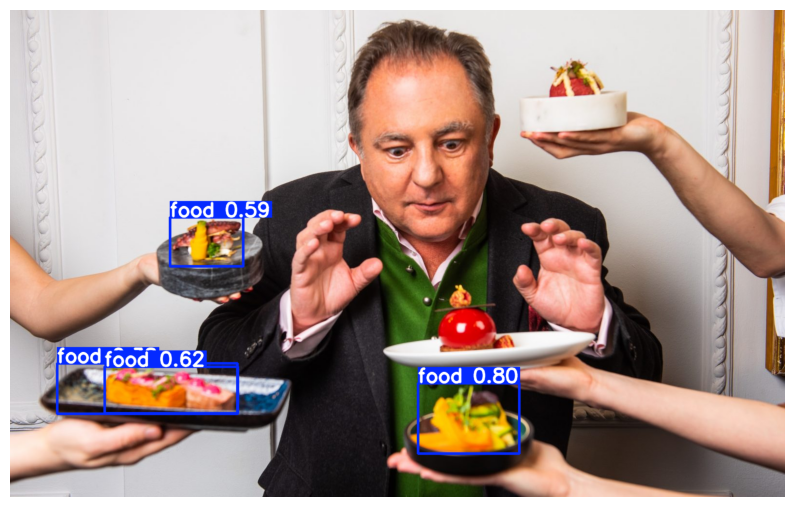

In [71]:
plt.figure(figsize=(10, 10)) 
plt.imshow(annotated_frame_rgb, cmap=None)
plt.axis("off")  
plt.show()

In [78]:
def blur_food(image_path):
    image = Image.open(image_path)
    image_cv2 = cv2.imread(image_path)
    result = model(image)
    annotated_frame = result[0].plot()  
    annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
    
    for box in result[0].boxes.xywh:
        x_center, y_center, width, height = box
    
        x1 = int((x_center - width / 2).item())
        y1 = int((y_center - height / 2).item())
        x2 = int((x_center + width / 2).item())
        y2 = int((y_center + height / 2).item())
        
    
        roi = img[y1:y2, x1:x2]
        
    
        blurred_roi = cv2.GaussianBlur(roi, (55, 55), 0)
    
        img[y1:y2, x1:x2] = blurred_roi
    
    plt.figure(figsize=(10, 10)) 
    plt.imshow(img, cmap=None)
    plt.axis("off")  
    plt.show()


0: 416x640 4 foods, 39.0ms
Speed: 3.0ms preprocess, 39.0ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)


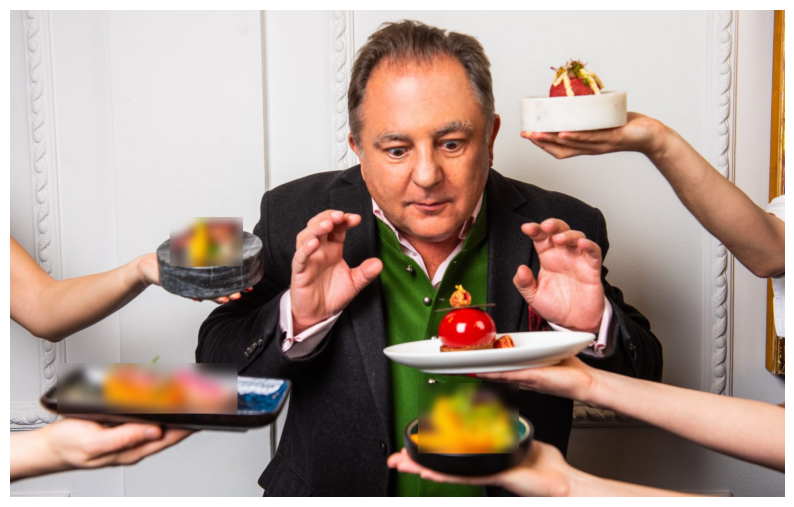

In [79]:
image_path = dir + "makl.jpg"

blur_food(image_path)


0: 480x640 3 foods, 39.7ms
Speed: 2.0ms preprocess, 39.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


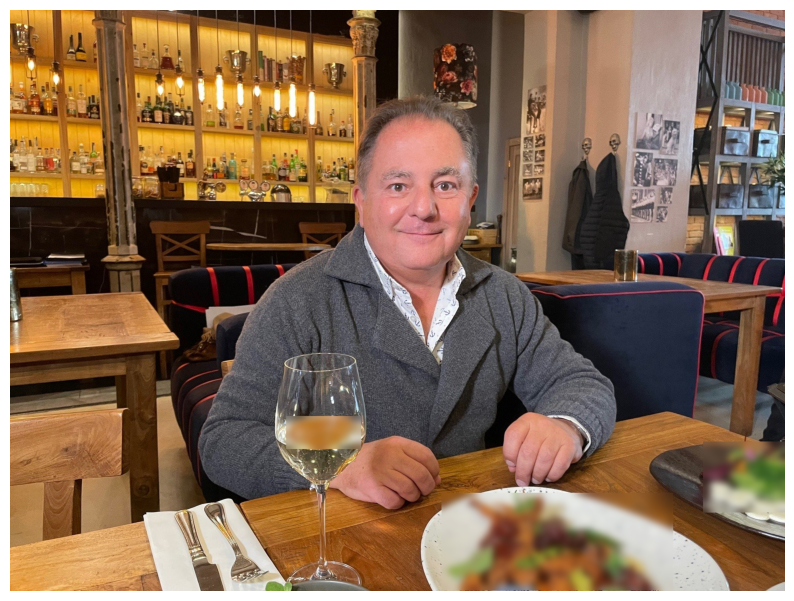

In [80]:
image_path = dir + "makl2.jpg"

blur_food(image_path)


0: 480x640 6 foods, 11.0ms
Speed: 4.0ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


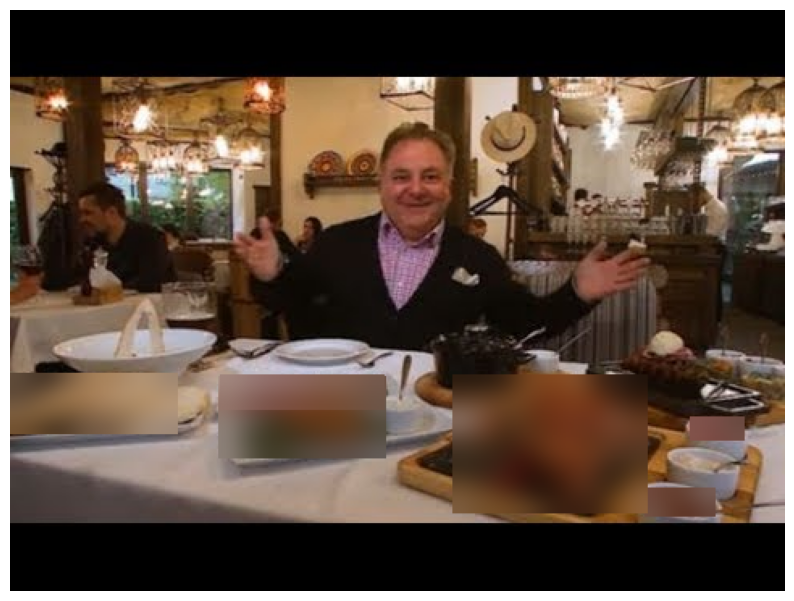

In [81]:
image_path = dir + "makl3.jpg"

blur_food(image_path)


0: 480x640 3 foods, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


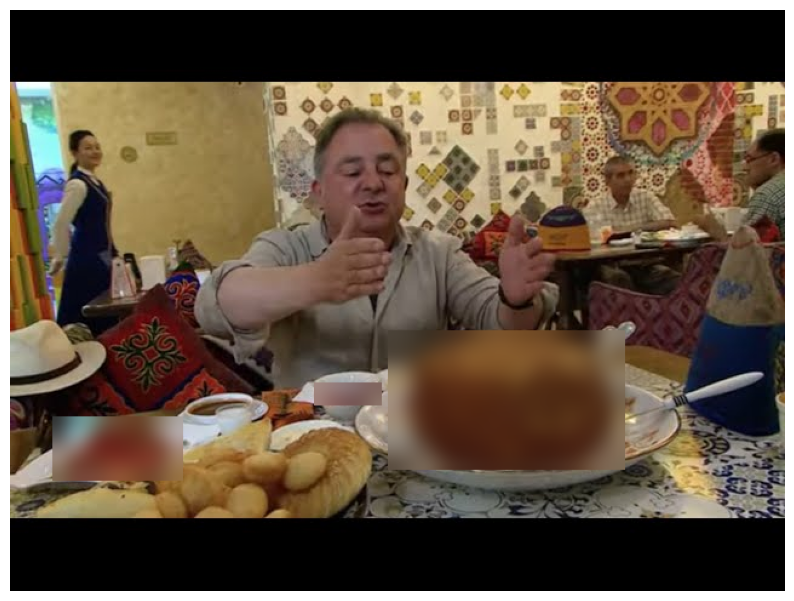

In [82]:
image_path = dir + "makl4.jpg"

blur_food(image_path)